# Task -1 Oasis infobyte

# IRIS-FLOWER CLASSIFCATION 

# Understand the problem statement

In [128]:
''' As a Data Scientist,We all of us have the indepth knowledge of Iris Dataset.
    The Data Set contains 3 classes of 50 instances of each,where each class refers to species of iris flower.
   The main objective of the problem statement is to build a classifier model by using advance data science techniques.
   Here I am trying play with different algorithms and its parameters to maximize the accuracy of model.'''



' As a Data Scientist,We all of us have the indepth knowledge of Iris Dataset.\n    The Data Set contains 3 classes of 50 instances of each,where each class refers to species of iris flower.\n   The main objective of the problem statement is to build a classifier model by using advance data science techniques.\n   Here I am trying play with different algorithms and its parameters to maximize the accuracy of model.'

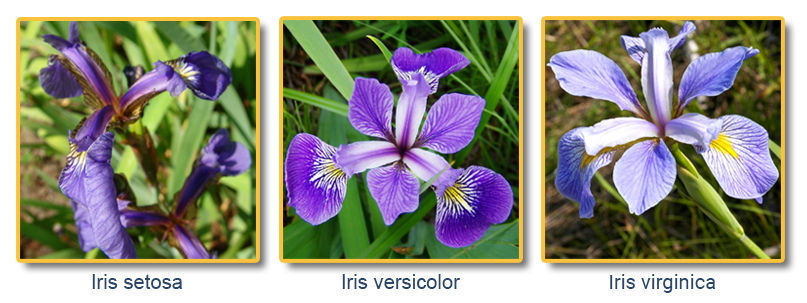

In [1]:
# Load libraries 

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

import warnings 
warnings.filterwarnings('ignore')


In [3]:
# read
df=pd.read_csv('iris.csv')

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# EDA operations 

In [6]:
df.size

750

In [7]:
df.shape

(150, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# to check datatypes
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [10]:
# to check stats information
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# to check correlation 
cr=df.corr()

In [12]:
cr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

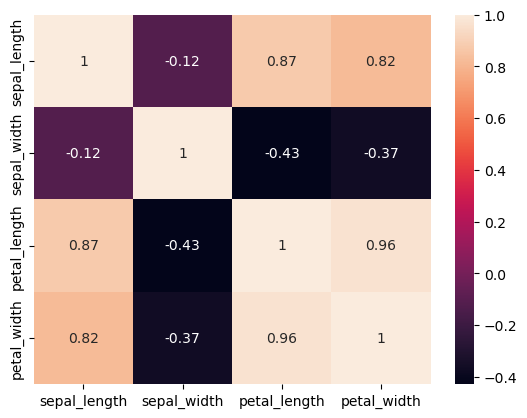

In [13]:
sns.heatmap(cr,annot=True)

In [14]:
# to find null values
df.isnull().sum().sum()


0

In [15]:
# to find duplicated values
df.duplicated().sum().sum()

1

In [16]:
# drop duplicates
df.drop_duplicates(inplace=True,ignore_index=True)

In [17]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica


In [18]:
df.size

745

In [19]:
df.shape

(149, 5)

In [20]:
# now our dataset is clean 

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

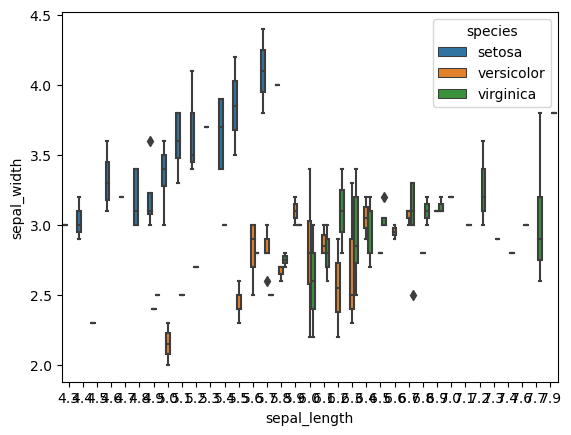

In [21]:
 # boxlot
sns.boxplot(x='sepal_length',y='sepal_width',data=df,hue='species')

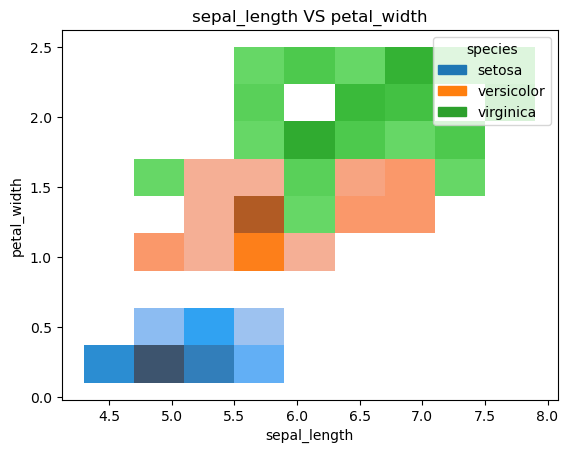

In [23]:
# Histogram
sns.histplot(x='sepal_length',y='petal_width',data=df,hue='species')
plt.title('sepal_length VS petal_width')
plt.show()

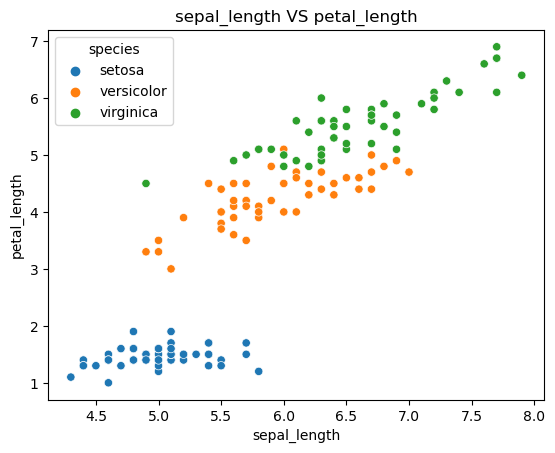

In [24]:
# scatterplot 
sns.scatterplot(x='sepal_length',y='petal_length',data=df,hue='species')
plt.title('sepal_length VS petal_length')
plt.show()

In [25]:
# preprocessing 
# encoding 
# we use map method to convert string to number 

In [26]:
print(df['species'].unique())


['setosa' 'versicolor' 'virginica']


In [27]:
df['species'] = df['species'].map({'setosa': 0, 'virginica': 1, 'versicolor': 2})


In [28]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,1
145,6.3,2.5,5.0,1.9,1
146,6.5,3.0,5.2,2.0,1
147,6.2,3.4,5.4,2.3,1


In [34]:
df['species'].value_counts()

0    50
2    50
1    49
Name: species, dtype: int64

In [39]:
# seprate X AND y
X=df.drop('species',axis=1)
y=df['species']

In [40]:
# scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=sc.fit_transform(X)

In [43]:
# cross validation 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,random_state=11)

# Logistic Regression

In [51]:
# model trainig 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [52]:
lr.score(X_train,y_train)

0.9831932773109243

In [53]:
lr.score(X_test,y_test)

0.9333333333333333

In [54]:
lr_pred=lr.predict(X_test)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [63]:
print('accuracy_score is' ,accuracy_score(y_test,lr_pred))

accuracy_score is 0.9333333333333333


In [64]:
print('confusion_matrix is' ,confusion_matrix(y_test,lr_pred))

confusion_matrix is [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 11]]


In [65]:
print('classification_report is' ,classification_report(y_test,lr_pred))

classification_report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



# Support vector Machine

In [106]:
from sklearn.svm import SVC
svc=SVC(C=10,degree=6,)
svc.fit(X_train,y_train)

SVC(C=10, degree=6)

In [107]:
svc.score(X_train,y_train)

0.9915966386554622

In [108]:
svc.score(X_test,y_test)

0.9666666666666667

In [109]:
svc_pred=svc.predict(X_test)

In [110]:
print('accuracy_score is' ,accuracy_score(y_test,svc_pred))
print('accuracy_score is' ,accuracy_score(y_test,svc_pred))
print('class_report is' ,classification_report(y_test,svc_pred))

accuracy_score is 0.9666666666666667
accuracy_score is 0.9666666666666667
class_report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      1.00      0.95         9
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# DecisionTree 

In [117]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',
    splitter='best', 
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=1,
    random_state=1,
    max_leaf_nodes=2,
    class_weight='balanced',
    ccp_alpha=0.01,)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=5,
                       max_features=1, max_leaf_nodes=2, random_state=1)

In [118]:
dt.score(X_train,y_train)

0.6638655462184874

In [119]:
dt.score(X_test,y_test)

0.7

In [120]:
dt_pred=dt.predict(X_test)

In [121]:
print('accuracy_score is' ,accuracy_score(y_test,dt_pred))
print('accuracy_score is' ,accuracy_score(y_test,dt_pred))


print('CR',classification_report(y_test,dt_pred))

accuracy_score is 0.7
accuracy_score is 0.7
CR               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.00      0.00      0.00         9
           2       0.57      1.00      0.73        12

    accuracy                           0.70        30
   macro avg       0.52      0.67      0.58        30
weighted avg       0.53      0.70      0.59        30



# KNN

In [114]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='kd_tree',
    leaf_size=30,
    p=2,
    metric='minkowski',
    n_jobs=-1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [115]:
knn.score(X_train,y_train)

0.9747899159663865

In [116]:
knn.score(X_test,y_test)

0.9666666666666667

In [123]:
knn_pred=knn.predict(X_test)

In [124]:
print('accuracy_score is' ,accuracy_score(y_test,knn_pred))
print('accuracy_score is' ,accuracy_score(y_test,knn_pred))


print('CR',classification_report(y_test,knn_pred))

accuracy_score is 0.9666666666666667
accuracy_score is 0.9666666666666667
CR               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      1.00      0.95         9
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# In above experiment,we have seen different accuracy with respect to different models like Logistic Regression,Support vector machine,Decision Tree, and KNN Among all of them KNN provide best accuracy for the small dataset.So I will consider KNN as my final model having train and test are 97% and 96%.